In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [16]:
data_ = pd.read_csv("data/train.csv")
data = data_.copy()

In [25]:
data.shape

(419487, 17)

In [26]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

DISTANCE      17618
DEP_DEL15    146820
dtype: int64

In [27]:
data.count()

ID                       419487
DATE_DEPARTURE_UTC       419487
DATE_ARRIVAL_UTC         419487
DATE_DEPARTURE_LCL       419487
DATE_ARRIVAL_LCL         419487
ORIGIN                   419487
ORIGIN_AIRPORT_ID        419487
DEST                     419487
DEST_AIRPORT_ID          419487
TAIL_NUM                 419487
OP_CARRIER               419487
OP_CARRIER_AIRLINE_ID    419487
OP_CARRIER_FL_NUM        419487
DISTANCE                 401869
CANCELLED                419487
DEP_DEL15                272667
ARR_DEL15                419487
dtype: int64

In [34]:
data['CANCELLED'].value_counts()

0    419487
Name: CANCELLED, dtype: int64

In [63]:
to_drop = ['ID', 'DATE_DEPARTURE_LCL', 'DATE_ARRIVAL_LCL', 'CANCELLED', 'ORIGIN', 'DEST']

In [64]:
df = data.drop(to_drop, axis=1)

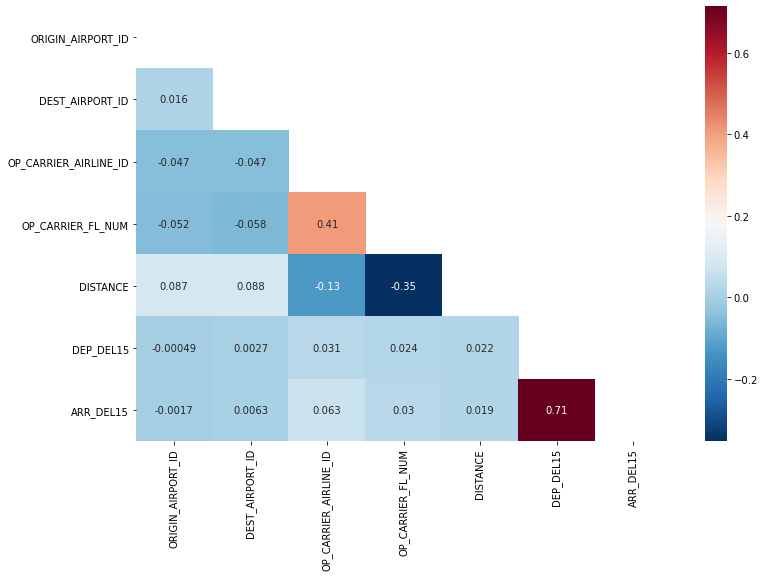

In [65]:
cor_df = df.corr()
lower_triangle_mask = np.triu(np.ones(cor_df.shape)).astype(np.bool)
cor_df_lower = cor_df.mask(lower_triangle_mask)
plt.figure(figsize = (12,8))
sns.heatmap(cor_df_lower, annot = True, cmap = "RdBu_r")

In [66]:
df.dtypes

DATE_DEPARTURE_UTC        object
DATE_ARRIVAL_UTC          object
ORIGIN_AIRPORT_ID          int64
DEST_AIRPORT_ID            int64
TAIL_NUM                  object
OP_CARRIER                object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER_FL_NUM          int64
DISTANCE                 float64
DEP_DEL15                float64
ARR_DEL15                  int64
dtype: object

In [67]:
df['DEP_DEL15'].fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
419482    0.0
419483    0.0
419484    0.0
419485    0.0
419486    0.0
Name: DEP_DEL15, Length: 419487, dtype: float64

In [68]:
df['DEP_DEL15'].value_counts()

0.0    232523
1.0     40144
Name: DEP_DEL15, dtype: int64

In [ ]:
to do:
    média por avião para replace no missing distance
    separar coluna data hora em coluna data coluna hora
    3 bins para distance
    3 bins para horários
    encoding categoricals
    scaling numericals
    
    não calcular 
    
    

In [78]:
df = df.assign(TAIL_NUM=df['TAIL_NUM'].astype('category'))
df = df.assign(OP_CARRIER =df['OP_CARRIER'].astype('category'))

In [79]:
df.dtypes

DATE_DEPARTURE_UTC         object
DATE_ARRIVAL_UTC           object
ORIGIN_AIRPORT_ID           int64
DEST_AIRPORT_ID             int64
TAIL_NUM                 category
OP_CARRIER               category
OP_CARRIER_AIRLINE_ID       int64
OP_CARRIER_FL_NUM           int64
DISTANCE                  float64
DEP_DEL15                 float64
ARR_DEL15                   int64
dtype: object

In [85]:
categoricals = df.select_dtypes(include='category').columns
categoricals

Index(['TAIL_NUM', 'OP_CARRIER'], dtype='object')

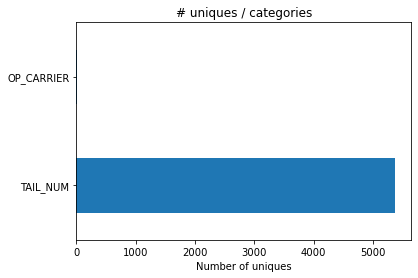

TAIL_NUM      5376
OP_CARRIER      17
dtype: int64

In [87]:
number_of_uniques_per_category = df.loc[:, categoricals].nunique()

# little plot 
number_of_uniques_per_category.plot(kind='barh',
                                    title='# uniques / categories');
plt.xlabel('Number of uniques')
plt.show()


number_of_uniques_per_category